In [78]:
import pandas as pd
df=pd.read_csv('Assignment_1_data.csv')
from sklearn.model_selection import train_test_split, GridSearchCV 
#df_train, df_test = train_test_split(df, test_size = 0.2, random_state=666)
df["outcome"] = df["outcome"].astype("int")

In [ ]:
We should first do something with the data, for example dealing with missing values in the database. After this we choose the correct features for the predictive model

In [79]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=666)
column_lst = dict()
for column_name in df_train.columns:
    column_lst[column_name] = len(df_train[df_train[column_name].isna()])/len(df_train)
L=sorted(column_lst.items(), key = lambda x: x[1], reverse = True)
for i in L:
    print(f"{i[0]}: {i[1]}")

total_protein_max: 0.9733822068445754
total_protein_min: 0.9733822068445754
bilirubin_indirect_max: 0.9579322393888527
bilirubin_indirect_min: 0.9579322393888527
bilirubin_direct_max: 0.9559453256140591
bilirubin_direct_min: 0.9559453256140591
chloride_min: 0.8329622143811449
chloride_max: 0.8329622143811449
sodium_min: 0.8214175602069131
sodium_max: 0.8214175602069131
sofa_respiration: 0.7912370251104792
calcium_min: 0.7464972080435751
calcium_max: 0.7464972080435751
lactate_min: 0.5640779692370936
lactate_max: 0.5640779692370936
bilirubin_total_max: 0.49100750231235657
bilirubin_total_min: 0.49100750231235657
sofa_liver: 0.49100750231235657
alp_max: 0.49090473091021203
alp_min: 0.49090473091021203
alt_max: 0.48908910280565926
alt_min: 0.48908910280565926
ast_min: 0.4858689322051317
ast_max: 0.4858689322051317
ph_min: 0.4839847898324826
ph_max: 0.4839847898324826
pt_min: 0.1135966565037169
pt_max: 0.1135966565037169
urineoutput: 0.04008084683635367
temperature_min: 0.01014011167825699

In [64]:
limitPer = len(df) * 0.40
df= df.dropna(thresh=limitPer, axis=1)
df=df.loc[:, df.isnull().mean() < 0.40]


In [66]:
df=df.loc[:, df.isnull().mean() < 0.40]

In [80]:
df_new_train= df_train[['gender','age','charlson_comorbidity_index','sofa_cns','sofa_renal','heart_rate_mean','sofa_cardiovascular','mbp_mean','sbp_mean','wbc_max','dbp_mean','creatinine_max','hemoglobin_max','sofa_coagulation','glucose_max','pt_max','temperature_mean','outcome']]
df_new_test= df_test[['gender','age','charlson_comorbidity_index','sofa_cns','sofa_renal','heart_rate_mean','sofa_cardiovascular','mbp_mean','sbp_mean','wbc_max','dbp_mean','creatinine_max','hemoglobin_max','sofa_coagulation','glucose_max','pt_max','temperature_mean','outcome']]

In [83]:
import pandas as pd
import numpy as np

# Define the set of continuous features
con_features = {"age", "charlson_comorbidity_index", "sofa_cns", "sofa_renal", "heart_rate_mean",
                "sofa_cardiovascular", "mbp_mean", "sbp_mean", "wbc_max", "dbp_mean", "creatinine_max",
                "hemoglobin_max", "sofa_coagulation", "glucose_max", "pt_max","temperature_mean", "outcome"}
# Fill missing values with the median for train and test dataframes
df_new_train = df_new_train.fillna({x: df_new_train[x].median() for x in list(con_features)})
df_new_test = df_new_test.fillna({x: df_new_train[x].median() for x in list(con_features)})


In [84]:
cat_features=['gender','outcome']
df_new_train[cat_features] = df_new_train[cat_features].fillna(df_new_train[cat_features].mode().iloc[0])
df_new_test[cat_features] = df_new_test[cat_features].fillna(df_new_test[cat_features].mode().iloc[0])

In [89]:
# Encode categorical string data into integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['gender', 'outcome']
for col in categorical_cols:
    df_new_train[col] = le.fit_transform(df_new_train[col])

In [87]:
from sklearn.feature_selection import mutual_info_classif

ranking_scores = mutual_info_classif(df_new_train.iloc[:,:-1], df_new_train.iloc[:, -1], discrete_features='auto', n_neighbors=20, random_state=666)
def feature_ranking(ranking_scores):
    feat2score = {idx:i for idx, i in enumerate(ranking_scores)}
    
    feat2score_sorted = {k: v for k, v in sorted(feat2score.items(), key=lambda item: item[1], reverse=True)}
    return feat2score_sorted
ranking_feat = list(feature_ranking(ranking_scores).keys())


In [91]:
def feature_ranking(ranking_scores):
    sorted_indices = sorted(range(len(ranking_scores)), key=lambda k: ranking_scores[k], reverse=True)
    return (sorted_indices)

sorted_feat_indices = sorted(range(len(ranking_scores)), key=lambda k: ranking_scores[k], reverse=True)

print(sorted_feat_indices)


[3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2, 9, 10, 7, 8, 12, 14]


In [92]:
from sklearn.feature_selection import mutual_info_classif
X_train = df_new_train.iloc[:, :-1].values
y_train = df_new_train.iloc[:, -1].values
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=20, copy=True)
for i, score in enumerate(mi_scores):
    print(f"Feature {i}: {score:.4f}")

Feature 0: 0.0005
Feature 1: 0.0009
Feature 2: 0.0000
Feature 3: 0.0165
Feature 4: 0.0000
Feature 5: 0.0018
Feature 6: 0.0004
Feature 7: 0.0000
Feature 8: 0.0000
Feature 9: 0.0008
Feature 10: 0.0001
Feature 11: 0.0006
Feature 12: 0.0001
Feature 13: 0.0010
Feature 14: 0.0003
Feature 15: 0.0015
Feature 16: 0.0013


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
auc_roc_ls = []
for i in range(len(ranking_feat)):
    print(f"------------iter {i}------------")
    print(f"features - {ranking_feat[:i+1]}")
    df_tr_used = df_new_train.iloc[:, ranking_feat[:i+1]]
    rf = RandomForestClassifier(random_state = 666)
    parameters = {"max_features": ["auto", "sqrt", "log2"], 'max_depth': [2, 5, 8], 'min_samples_split': [2, 5, 8]}
    clf = GridSearchCV(rf, parameters)
    clf.fit(df_tr_used, df_new_train['outcome'])
    y_prob = clf.predict_proba(df_tr_used)[:, 1]
    print("Grid searching")
    print(f"Best param: {clf.best_params_}")
    auc_roc = roc_auc_score(df_new_train['outcome'], y_prob)
    auc_roc_ls.append(auc_roc)

------------iter 0------------
features - [3]
Grid searching
Best param: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}
------------iter 1------------
features - [3, 5]
Grid searching
Best param: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}
------------iter 2------------
features - [3, 5, 16]
Grid searching
Best param: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}
------------iter 3------------
features - [3, 5, 16, 15]
Grid searching
Best param: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}
------------iter 4------------
features - [3, 5, 16, 15, 0]
Grid searching
Best param: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}
------------iter 5------------
features - [3, 5, 16, 15, 0, 1]
Grid searching
Best param: {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 2}
------------iter 6------------
features - [3, 5, 16, 15, 0, 1, 4]
Grid searching
Best param: {'max_depth': 2, 'max_featu

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
auc_roc_ls = []
for i in range(len(ranking_feat)):
    print(f"------------iter {i}------------")
    print(f"features - {ranking_feat[:i+1]}")
    df_tr_used = df_new_train.iloc[:, ranking_feat[:i+1]]
    lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=666)
    parameters = {'C': [0.1, 1, 10]}
    print("Grid searching")
    clf = GridSearchCV(lr, parameters)
    clf.fit(df_tr_used, df_new_train['outcome'])
    y_prob = clf.predict_proba(df_tr_used)[:, 1]
    print(f"Best param: {clf.best_params_}")
    auc_roc = roc_auc_score(df_new_train['outcome'], y_prob)
    auc_roc_ls.append(auc_roc)



------------iter 0------------
features - [3]
Grid searching
Best param: {'C': 0.1}
------------iter 1------------
features - [3, 5]
Grid searching
Best param: {'C': 0.1}
------------iter 2------------
features - [3, 5, 16]
Grid searching


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/s

Best param: {'C': 0.1}
------------iter 3------------
features - [3, 5, 16, 15]
Grid searching


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best param: {'C': 0.1}
------------iter 4------------
features - [3, 5, 16, 15, 0]
Grid searching


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best param: {'C': 0.1}
------------iter 5------------
features - [3, 5, 16, 15, 0, 1]
Grid searching
Best param: {'C': 10}
------------iter 6------------
features - [3, 5, 16, 15, 0, 1, 4]
Grid searching
Best param: {'C': 0.1}
------------iter 7------------
features - [3, 5, 16, 15, 0, 1, 4, 13]
Grid searching


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best param: {'C': 0.1}
------------iter 8------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11]
Grid searching
Best param: {'C': 0.1}
------------iter 9------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6]
Grid searching


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best param: {'C': 0.1}
------------iter 10------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2]
Grid searching


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best param: {'C': 0.1}
------------iter 11------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2, 9]
Grid searching
Best param: {'C': 0.1}
------------iter 12------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2, 9, 10]
Grid searching
Best param: {'C': 0.1}
------------iter 13------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2, 9, 10, 7]
Grid searching
Best param: {'C': 1}
------------iter 14------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2, 9, 10, 7, 8]
Grid searching
Best param: {'C': 0.1}
------------iter 15------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2, 9, 10, 7, 8, 12]
Grid searching
Best param: {'C': 0.1}
------------iter 16------------
features - [3, 5, 16, 15, 0, 1, 4, 13, 11, 6, 2, 9, 10, 7, 8, 12, 14]
Grid searching
Best param: {'C': 0.1}


In [26]:
auc_roc_ls

[0.7468226160440368,
 0.7571724699261033,
 0.7547379945546323,
 0.7574086614852757,
 0.7604662913457909,
 0.7633207605916463,
 0.759581326009669,
 0.7597167325762613,
 0.7600131311541709,
 0.7611829545435317,
 0.7624788776247502,
 0.7625087949966242,
 0.7637688104629579,
 0.7663294532126486,
 0.7650233094908123,
 0.7650971214682526,
 0.7651977372449282]

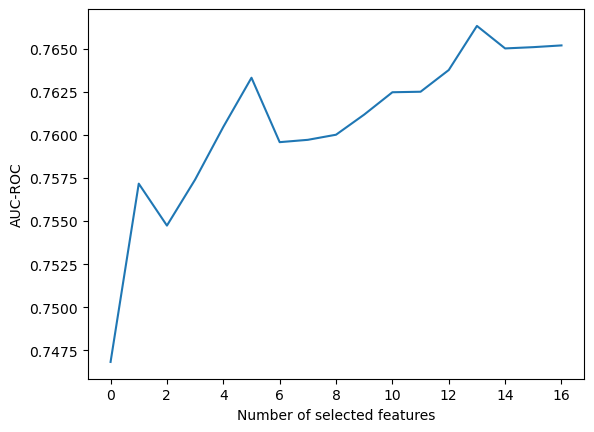

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(auc_roc_ls))], auc_roc_ls)
plt.xlabel("Number of selected features")
plt.ylabel("AUC-ROC")
plt.savefig('changes_of_AUCROC.png')
plt.show()

In [28]:
for col in df_new_train[df_new_train.columns[ranking_feat[:8]]].columns:
    print(col)


sofa_cns
heart_rate_mean
temperature_mean
pt_max
gender
age
sofa_renal
sofa_coagulation


In [90]:
# Select the top 8 features from df_new_train
feature_indices = ranking_feat[:8]
df_trainModel = df_new_train.iloc[:, feature_indices]
df_testModel = df_new_test.iloc[:, feature_indices]

# Create target variables for the training and test sets
y_tr = df_new_train['outcome']
y_te = df_new_test['outcome']


In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 666)
parameters = {"C": [0.1, 1, 10], "solver": ["saga", "liblinear", "lbfgs"], "max_iter": [100, 200, 300]}

print("Grid searching")
clf = GridSearchCV(lr, parameters, n_jobs = -1)

clf.fit(df_trainModel, y_tr)
print(f"Best param: {clf.best_params_}")

y_tr_prob = clf.predict_proba(df_trainModel)[:, 1]
y_te_prob = clf.predict_proba(df_trainModel)[:, 1]

Grid searching


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

Best param: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [74]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
df_trainModel_new, df_testModel_new, y_tr_new, y_te_new = train_test_split(df_trainModel, y_tr, test_size=0.25, random_state=666)

# Train the model using the new training set and evaluate it using the new testing set
model = LogisticRegression(random_state=666)
model.fit(df_trainModel_new, y_tr_new)
y_te_prob = model.predict_proba(df_testModel_new)[:, 1]


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


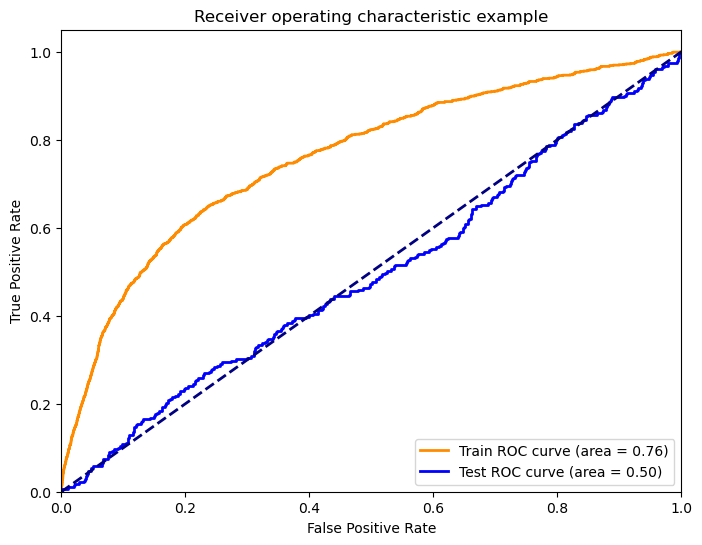

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr_tr, tpr_tr, _ = roc_curve(y_tr, y_tr_prob)
roc_auc_tr = auc(fpr_tr, tpr_tr)

fpr_te, tpr_te, _ = roc_curve(y_te, y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)

fpr_te, tpr_te, _ = roc_curve(y_te, y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc_tr)
plt.plot(fpr_te, tpr_te, color='blue',
         lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc_te)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Assuming df_trainModel and df_testModel are the input dataframes

# Fill missing values with "Unknown"
df_trainModel.fillna("Unknown", inplace=True)
df_testModel.fillna("Unknown", inplace=True)

# One-hot encode categorical variables using pd.get_dummies()
df_trainModel = pd.get_dummies(df_trainModel)
df_testModel = pd.get_dummies(df_testModel)

# Align the test data with the training data to ensure that they have the same columns
df_testModel = df_testModel.reindex(columns=df_trainModel.columns, fill_value=0)

# Initialize the GradientBoostingClassifier with random_state=666
gbc = GradientBoostingClassifier(random_state=666)

# Define the hyperparameters to tune using GridSearchCV
parameters = {'n_estimators': [100, 200, 300], 'max_depth': [2, 5, 8], 'learning_rate': [0.01, 0.1, 1]}

# Perform grid search using GridSearchCV
print("Grid searching")
clf = GridSearchCV(gbc, parameters, n_jobs=-1)
clf.fit(df_trainModel, y_tr)
print(f"Best param: {clf.best_params_}")

# Predict probabilities for training and test data
y_tr_prob = clf.predict_proba(df_trainModel)[:, 1]
y_te_prob = clf.predict_proba(df_testModel)[:, 1]


/var/folders/f5/3ffdj8kn2k33x1d7d_7z403c0000gn/T/ipykernel_2302/2613864817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainModel.fillna("Unknown", inplace=True)
/var/folders/f5/3ffdj8kn2k33x1d7d_7z403c0000gn/T/ipykernel_2302/2613864817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testModel.fillna("Unknown", inplace=True)


Grid searching
Best param: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


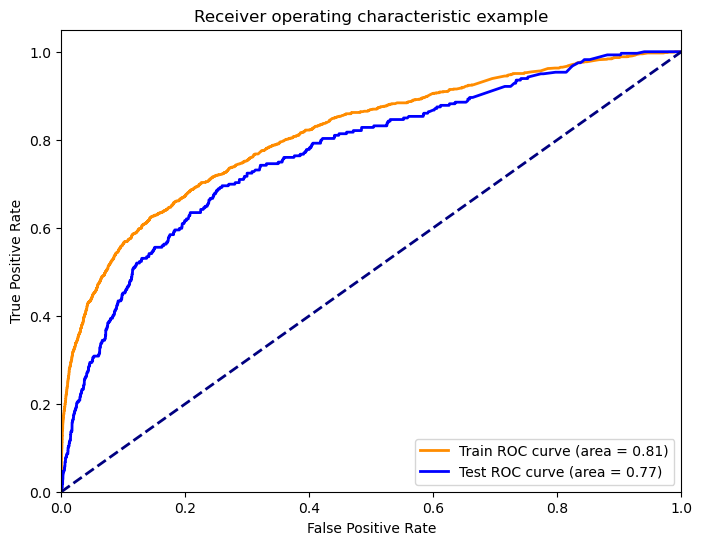

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr_tr, tpr_tr, _ = roc_curve(y_tr, y_tr_prob)
roc_auc_tr = auc(fpr_tr, tpr_tr)

fpr_te, tpr_te, _ = roc_curve(y_te, y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)

fpr_te, tpr_te, _ = roc_curve(y_te, y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc_tr)
plt.plot(fpr_te, tpr_te, color='blue',
         lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc_te)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
# Set random seed
random_seed = 666

# Define hyperparameters
param_grid = {
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [2, 5, 8],
    "min_samples_split": [2, 5, 8],
    "random_state": [random_seed]
}

# Create RandomForestClassifier object
rf_clf = RandomForestClassifier()

# Perform grid search with cross-validation
clf = GridSearchCV(rf_clf, param_grid, n_jobs=-1, cv=5)
clf.fit(df_trainModel, y_tr)

# Print best hyperparameters
print(f"Best hyperparameters: {clf.best_params_}")

# Predict probabilities for training and test sets
y_tr_prob = clf.predict_proba(df_trainModel)[:, 1]
y_te_prob = clf.predict_proba(df_trainModel)[:, 1]


Best hyperparameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 5, 'random_state': 666}


In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
df_trainModel_new, df_testModel_new, y_tr_new, y_te_new = train_test_split(df_trainModel, y_tr, test_size=0.25, random_state=666)

# Train the model using the new training set and evaluate it using the new testing set
model = LogisticRegression(random_state=666)
model.fit(df_trainModel_new, y_tr_new)
y_te_prob = model.predict_proba(df_testModel_new)[:, 1]


/Users/angel_gym/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


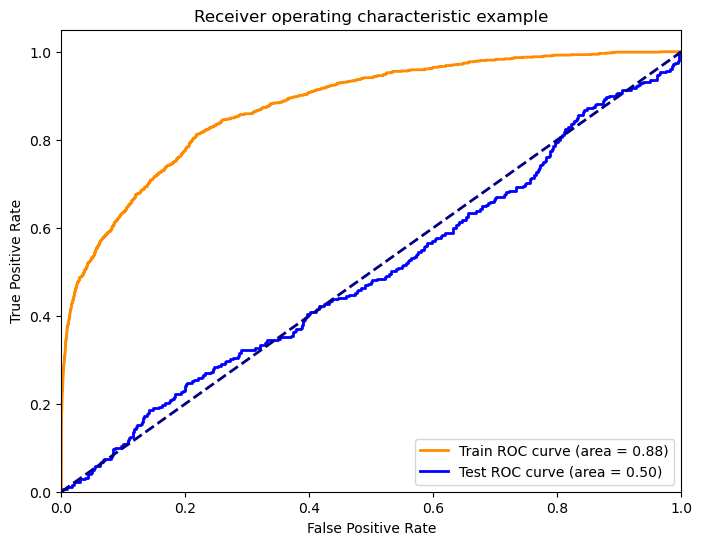

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr_tr, tpr_tr, _ = roc_curve(y_tr, y_tr_prob)
roc_auc_tr = auc(fpr_tr, tpr_tr)

fpr_te, tpr_te, _ = roc_curve(y_te, y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)

fpr_te, tpr_te, _ = roc_curve(y_te, y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc_tr)
plt.plot(fpr_te, tpr_te, color='blue',
         lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc_te)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()